In [8]:
!pip install plotly

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from plotly.subplots import make_subplots
import datetime as dt

In [10]:
data = pd.read_excel("E:/Projects/project04/Election_Winner_Predictor/dataset/dataset.xlsx")

In [11]:
data.head(10)

Number  Age     District  Nominator ID             Nominator Age Group
0       1   99       Mannar             3  Ranil Wickremasinghe       75+
1       2   53       Matara             1          Anura Kumara     35-55
2       3   43       Mannar             3  Ranil Wickremasinghe     35-55
3       4   52     Puttalam             2      Sajith Premadasa     35-55
4       5   26   Monaragala             1          Anura Kumara     25-35
5       6   97   Mullaitivu             2      Sajith Premadasa       75+
6       7   70    Ratnapura             3  Ranil Wickremasinghe     55-75
7       8   96  Kilinochchi             1          Anura Kumara       75+
8       9   59   Mullaitivu             3  Ranil Wickremasinghe     55-75
9      10   35        Galle             2      Sajith Premadasa     25-35

In [12]:
data.shape

(10000, 6)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Number        10000 non-null  int64 
 1   Age           10000 non-null  int64 
 2   District      10000 non-null  object
 3   Nominator ID  10000 non-null  int64 
 4   Nominator     10000 non-null  object
 5   Age Group     10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


In [15]:
data.describe()

Number           Age  Nominator ID
count  10000.00000  10000.000000  10000.000000
mean    5000.50000     59.100500      1.646800
std     2886.89568     23.941235      0.756245
min        1.00000     18.000000      1.000000
25%     2500.75000     38.000000      1.000000
50%     5000.50000     59.000000      1.000000
75%     7500.25000     80.000000      2.000000
max    10000.00000    100.000000      4.000000

In [16]:
data.duplicated().sum()

np.int64(0)

In [17]:
data.isnull().sum()

Number          0
Age             0
District        0
Nominator ID    0
Nominator       0
Age Group       0
dtype: int64

In [142]:
print(data.columns)

Index(['Number', 'Age', 'District', 'Nominator ID', 'Nominator', 'Age Group'], dtype='object')


In [143]:
data.style.background_gradient(cmap='viridis')

In [144]:
district_counts = data['District'].value_counts()

In [145]:
district_counts_df = district_counts.reset_index()
district_counts_df.columns = ['District', 'Voter Count']

In [146]:
top_10_districts = district_counts_df

In [147]:
top_10_districts

District  Voter Count
0    Trincomalee          423
1       Puttalam          421
2       Vavuniya          419
3          Kandy          416
4     Monaragala          414
5        Colombo          412
6       Kalutara          411
7     Batticaloa          408
8     Kurunegala          408
9        Kegalle          407
10    Mullaitivu          404
11       Badulla          401
12  Nuwara Eliya          401
13     Ratnapura          399
14        Matara          397
15  Anuradhapura          395
16        Mannar          393
17   Kilinochchi          393
18        Matale          392
19        Ampara          391
20        Jaffna          387
21   Polonnaruwa          385
22         Galle          378
23       Gampaha          376
24    Hambantota          369

C:\Users\Asitha79\AppData\Local\Temp\ipykernel_19588\1514343220.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




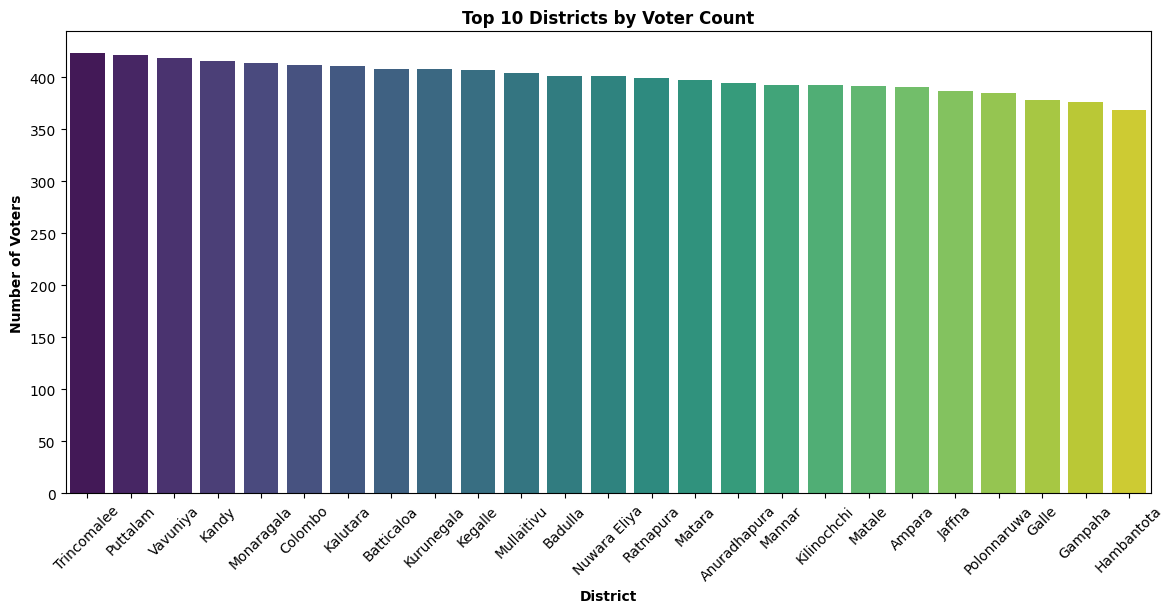

In [149]:
plt.figure(figsize=(14, 6))
sns.barplot(data=top_10_districts, x='District', y='Voter Count', palette='viridis')
plt.title('Top 10 Districts by Voter Count', fontweight='bold')
plt.xlabel('District', fontweight='bold' )
plt.ylabel('Number of Voters', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

C:\Users\Asitha79\AppData\Local\Temp\ipykernel_19588\512696018.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




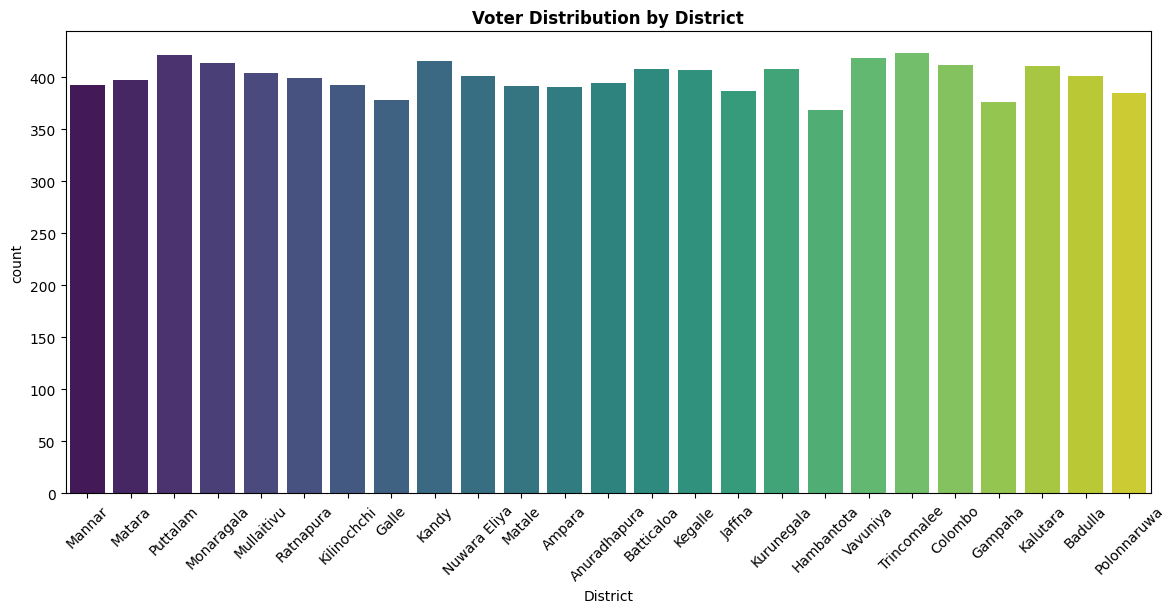

In [150]:
plt.figure(figsize=(14, 6))
sns.countplot(data=data, x='District', palette='viridis')
plt.title('Voter Distribution by District', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

In [69]:
age_counts = data['Age'].value_counts()

In [70]:
age_counts_df = age_counts.reset_index()
age_counts_df.columns = ['Age', 'Count']

In [71]:
top_10_ages = age_counts_df.head(10)

In [72]:
top_10_ages

Age  Count
0   26    142
1   78    141
2   25    139
3   67    138
4   79    137
5   55    136
6   23    135
7   69    135
8   49    134
9   60    133

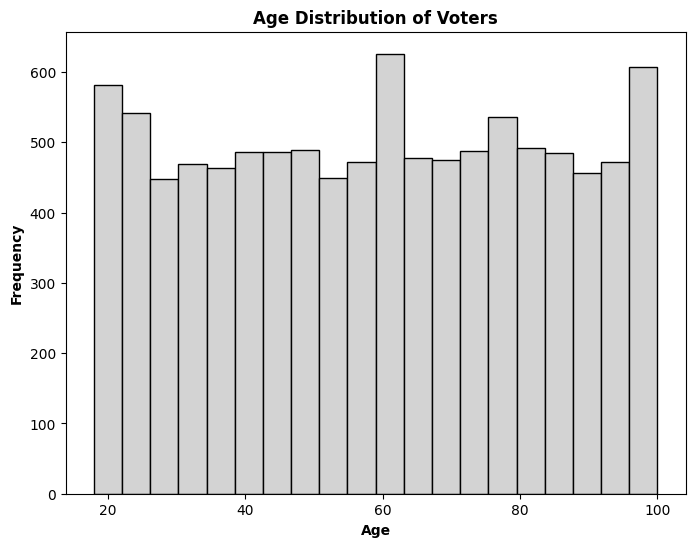

In [153]:
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, color='lightgray', edgecolor='black')
plt.title('Age Distribution of Voters', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.show()


In [158]:
age_nominator_counts = data.groupby(['Age', 'Nominator']).size().reset_index(name='Voter Count')

In [159]:
color_palette = {
    'Anura Kumara': 'crimson',
    'Sajith Premadasa': 'limegreen',
    'Ranil Wickremasinghe': 'gold',
    'Other': 'royalblue'
}

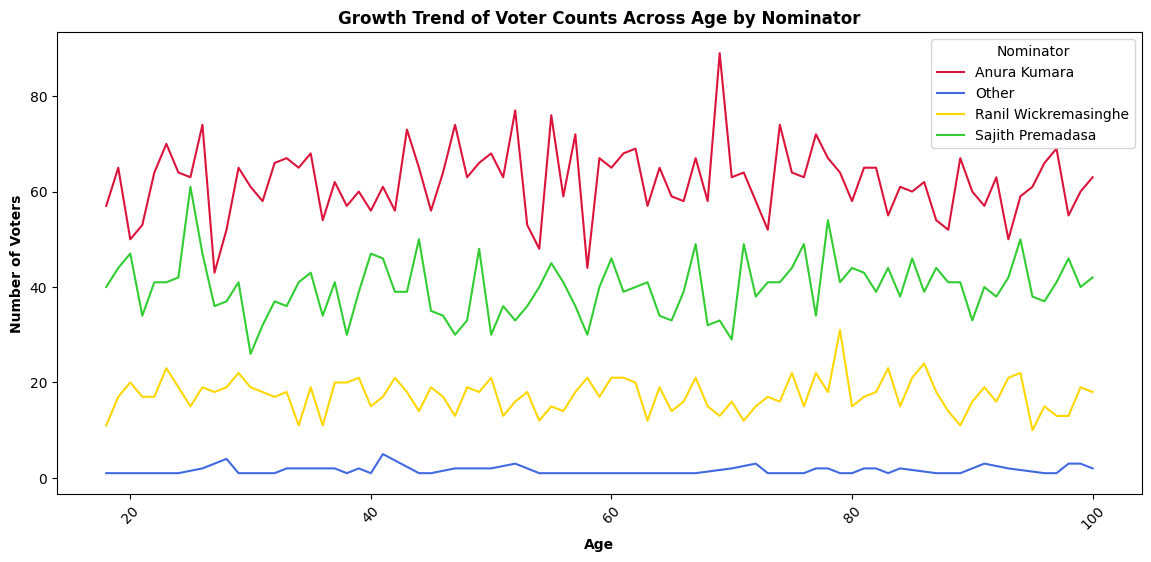

In [164]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=age_nominator_counts, x='Age', y='Voter Count', hue='Nominator', palette=color_palette)
plt.title('Growth Trend of Voter Counts Across Age by Nominator', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Number of Voters', fontweight='bold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Nominator')  # Optional: add a legend title
plt.show()

In [76]:
age_group_counts = data['Age Group'].value_counts()

In [77]:
age_group_counts_df = age_group_counts.reset_index()
age_group_counts_df.columns = ['Age Group', 'Voter Count']

In [78]:
top_10_age_groups = age_group_counts_df.head(10)

In [154]:
top_10_age_groups

Age Group  Voter Count
0       75+         3049
1     55-75         2401
2     35-55         2380
3     25-35         1189
4     18-25          981

In [155]:
top_10_age_groups_sorted = top_10_age_groups.sort_values(by='Voter Count', ascending=False)

C:\Users\Asitha79\AppData\Local\Temp\ipykernel_19588\1911772617.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




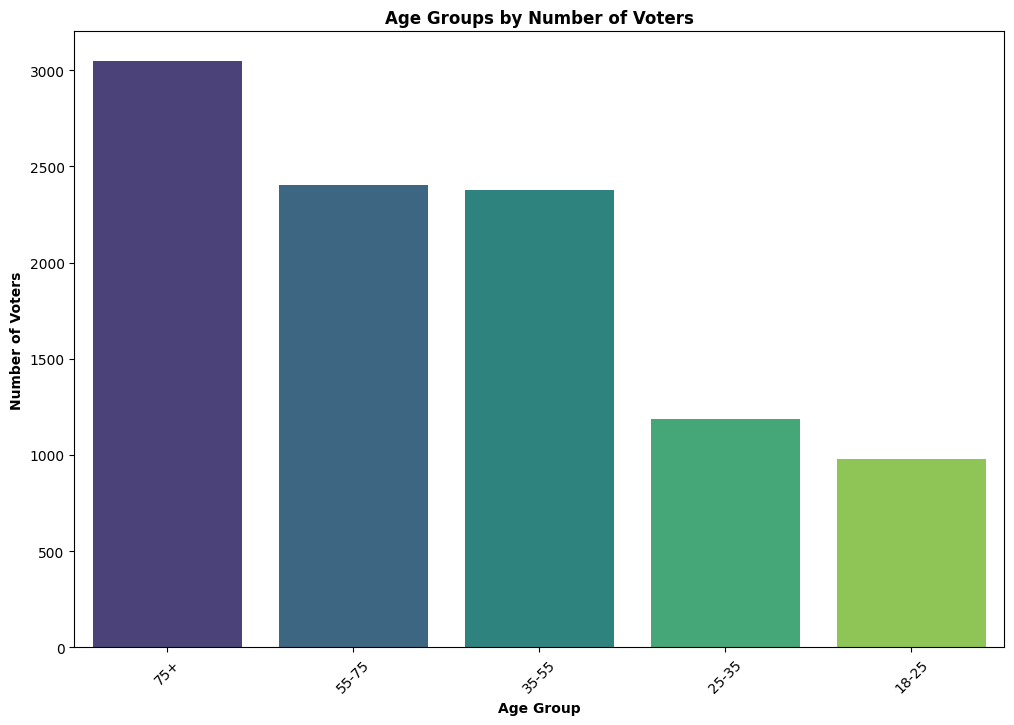

In [165]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_age_groups, x='Age Group', y='Voter Count', palette='viridis')
plt.title('Age Groups by Number of Voters', fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Number of Voters', fontweight='bold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

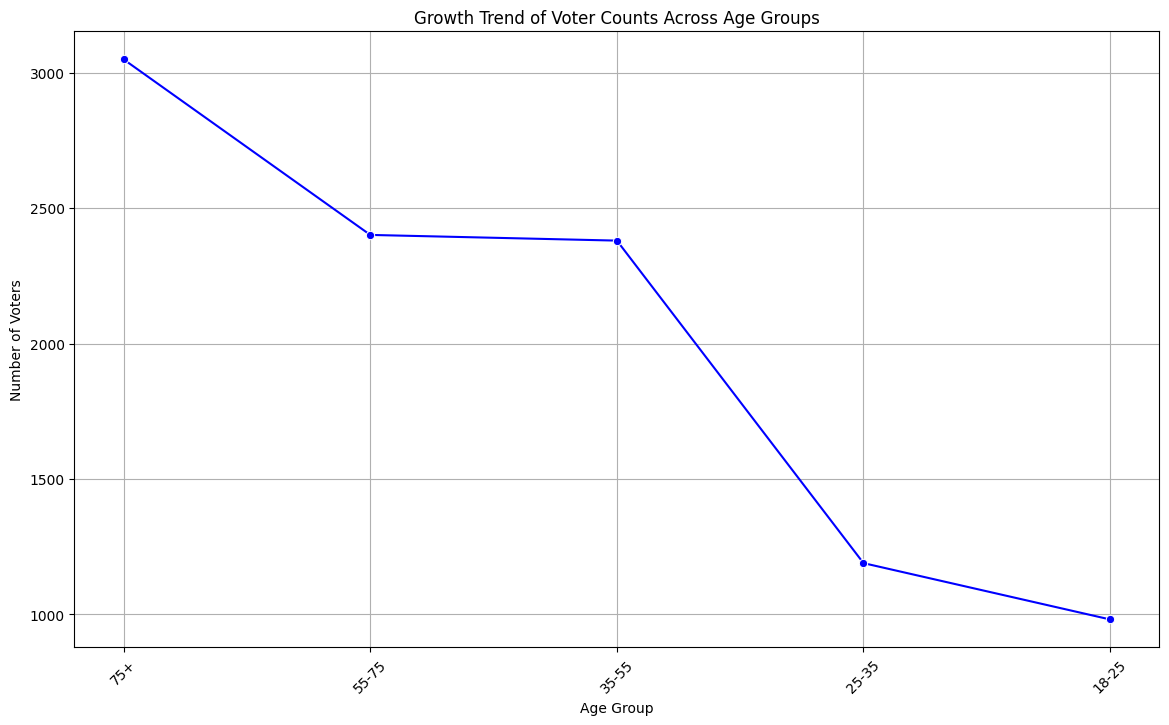

In [104]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=age_group_counts_df, x='Age Group', y='Voter Count', marker='o', color='b')
plt.title('Growth Trend of Voter Counts Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Voters')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Optional: add a grid for better readability
plt.show()

In [101]:
color_palette = {
    'Anura Kumara': 'crimson',
    'Sajith Premadasa': 'limegreen',
    'Ranil Wickremasinghe': 'gold',
    'Other': 'royalblue'
}

In [108]:
nominator_counts = data['Nominator'].value_counts()

In [109]:
nominator_counts_df = nominator_counts.reset_index()
nominator_counts_df.columns = ['Nominator', 'Voter Count']

C:\Users\Asitha79\AppData\Local\Temp\ipykernel_19588\3540601518.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



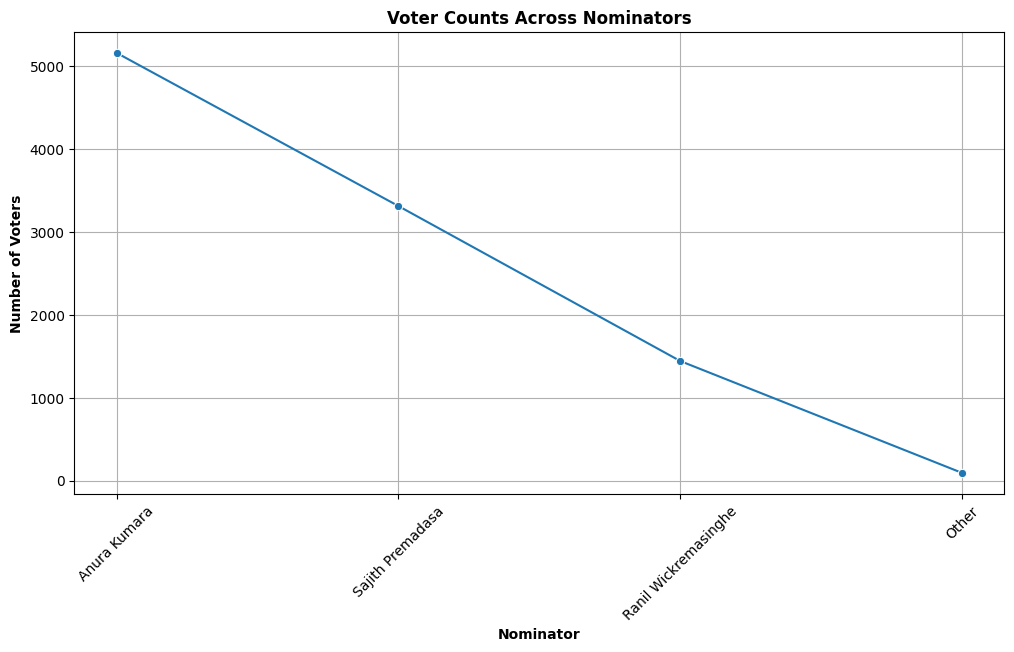

In [163]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=nominator_counts_df, x='Nominator', y='Voter Count', marker='o', palette=color_palette)
plt.title('Voter Counts Across Nominators', fontweight='bold')
plt.xlabel('Nominator', fontweight='bold')
plt.ylabel('Number of Voters', fontweight='bold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Optional: add a grid for better readability
plt.show()

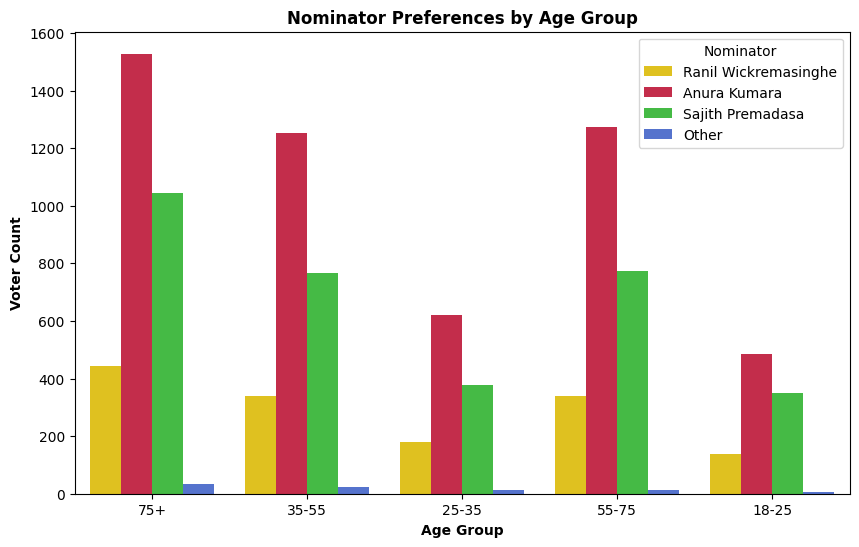

In [170]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Age Group', hue='Nominator', palette=color_palette)
plt.title('Nominator Preferences by Age Group', fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Voter Count', fontweight='bold')
plt.show()


C:\Users\Asitha79\AppData\Local\Temp\ipykernel_19588\3371592994.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




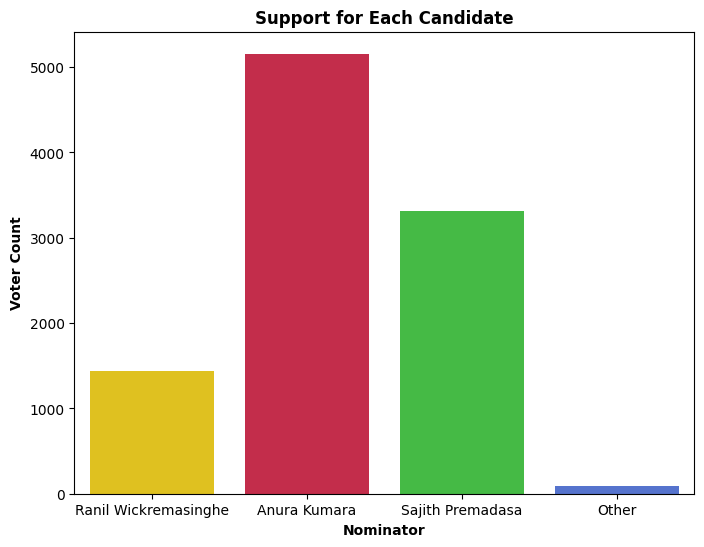

In [171]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Nominator', palette=color_palette)
plt.title('Support for Each Candidate', fontweight='bold')
plt.xlabel('Nominator', fontweight='bold')
plt.ylabel('Voter Count', fontweight='bold')
plt.show()

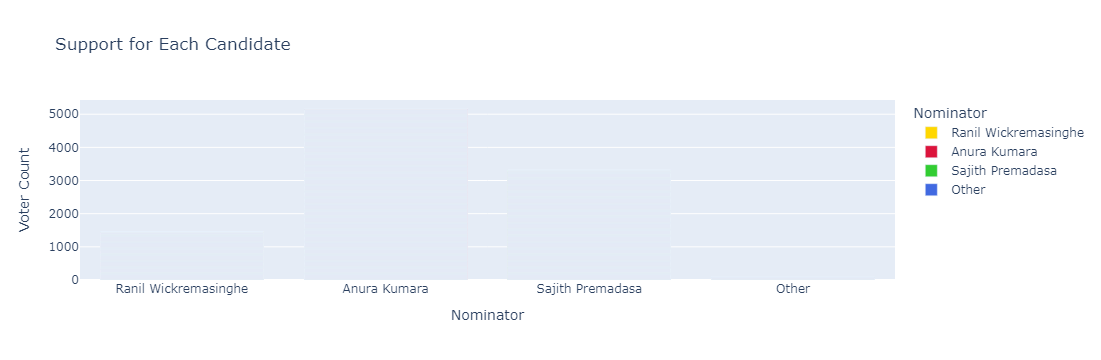

In [175]:
fig = px.bar(data, x='Nominator', color='Nominator', color_discrete_map=color_palette,
             title='Support for Each Candidate' )
fig.update_layout(xaxis_title='Nominator', yaxis_title='Voter Count')
fig.show()


In [130]:
nominator_counts = data['Nominator'].value_counts()

In [131]:
nominator_labels = nominator_counts.index
nominator_sizes = nominator_counts.values

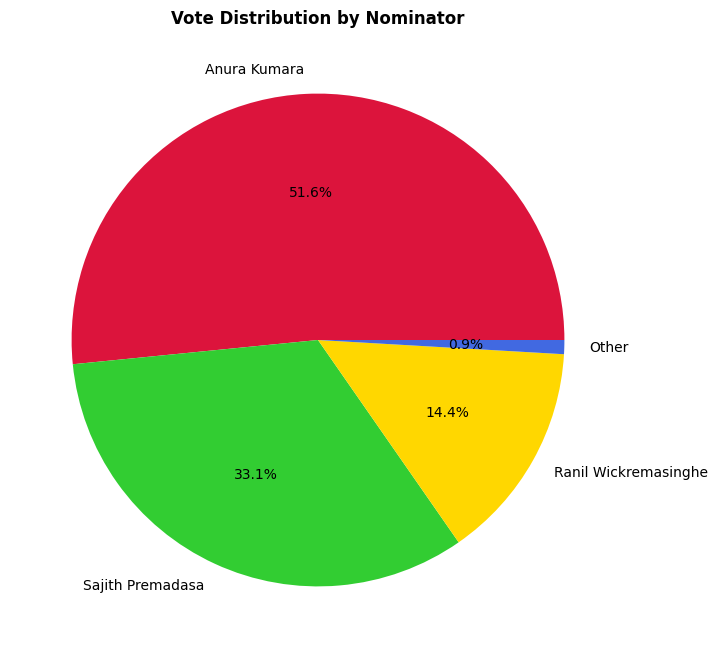

In [168]:
plt.figure(figsize=(10, 8))
plt.pie(nominator_sizes, labels=nominator_labels, autopct='%1.1f%%', colors=['crimson', 'limegreen', 'gold', 'royalblue'])
plt.title('Vote Distribution by Nominator', fontweight='bold')
plt.show()